1. Minimalne drzewa rozpinające (minimal spanning trees - $MST$)
 - $G=(V,E)$ - graf nieskierowany ( - musi być spójny)
 - $W: E \rightarrow \R$
 - cel: znaleźć podzbiór krawędzi tworzący spójny podgraf (obejmujący wszystkie wierzchołki) o minimalnej sumie wag

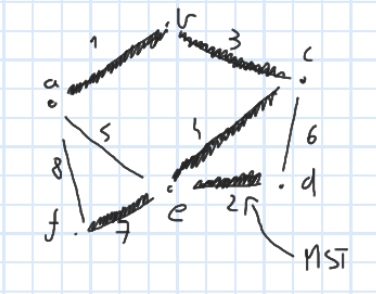

Obserwacja:
 - $G=(V,E)$, $W: E \rightarrow \R_+$
 - jeśli $A \subseteq E$ jest podzbiorem krawędzi pewnego $MST$ dla $G$ oraz $e=\{u,v\}$ jest krawędzia, taką że:
    - $e\notin A$
    - $A \cup \{e\}$ nie zawiera cyklu
    - $e$ ma minimalny koszt wśród krawędzi spełniających powyższe warunki </br>
    to $A \cup \{e\}$ jest podzbiorem krawędzi $MST$ dla $G$

Dowód:
 - jeśli $e=\{u,v\}$ (spełaniająca warunki) nie należy do żadnego $MST$ </br> zawierającego $A$, to jakaś inna krawędź (spoza $A$) służy do zapewnienia trasy (z $u$ do $v$) w $MST$ rozpinającym A
 - niech to będzie $e'=\{x,y\}$, $T'$ - rozpinające $A$

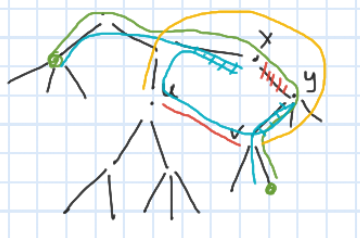
 - tworzymy $T=(T'-\{e'\}) \cup \{e\}$
 - $w(e') \geq w(e)$
 - $w(T) \leq w(T')$, więc $T$ to $MST$

Algorytm Kruskala dla $MST$
 - posortuj krawędzie po wagach
 - $A=\emptyset$
 - przeglądaj krawędzie $e \in E$ w kolejności nierosnących wag:
    - jeśli $A \cup \{e\}$ nie zawiera cyklu, to $A:= A \cup \{e\}$
 - zwracamy $A$

 - złożoność: $O(ElogV)$ o ile szybko wykrywamy cykle

In [32]:

class Node:
    def __init__(self,value):
        self.parent=self
        self.rank=0
        self.value=value
        
def findSet(x):
    if x.parent!=x:
        x.parent=findSet(x.parent)
    return x.parent

def findUnion(x,y):
    x=findSet(x)
    y=findSet(y)
    if x.rank>y.rank:
        y.parent=x
    else:
        x.parent=y
        if x.rank==y.rank:
            y.rank+=1

def Kruskal(E,n):
    A=[]
    V=[Node(i) for i in range(n)]
    # G=[[] for _  in range(n)]
    E.sort(key=lambda x: x[2])
    cost=0
    for e in E:
        u,v,w=e
        if findSet(V[u])!=findSet(V[v]):
            findUnion(V[u],V[v])
            # G[u].append((v,w)) opcja dla zwrotu w postaci listy sąsiedztwa
            A+=[e]
            cost+=w
    return A,cost

G=[
    [[1,1],[4,4],[5,8]],
    [[0,1],[2,3]],
    [[1,3],[3,6],[4,4]],
    [[2,6],[4,2]],
    [[0,4],[2,4],[3,2],[5,7]],
    [[0,8],[4,7]]
]

G2=[
    [(2, 0), (3, 5)],
    [(3, -2), (4, 3)],
    [(0, 0)],
    [(1, -2), (0, 5), (5, 2)],
    [(1, 3)],
    [(3, 2), (6, 1)],
    [(5, 1)]
]

G3=[
    [(3, 3)],
    [(4, 2), (2, 4)],
    [(1, 4)],
    [(0, 3), (4, 1), (6, 8)],
    [(1, 2), (3, 1), (5, 7), (7, 9)],
    [(4, 7)],
    [(3, 8)],
    [(4, 9),(8, 5)],
    [(7, 5)],
]

def kruskal_check(G):
    E=[]
    for i in range(len(G)):
        for j in range(len(G[i])):
            E.append((i,G[i][j][0],G[i][j][1]))
    A,cost=Kruskal(E,len(E))
    print("list of spanning edges:",A)
    print("cost of the MST:",cost)
    
kruskal_check(G)
kruskal_check(G2)
kruskal_check(G3)

list of spanning edges: [(0, 1, 1), (3, 4, 2), (1, 2, 3), (0, 4, 4), (4, 5, 7)]
cost of the MST: 17
list of spanning edges: [(1, 3, -2), (0, 2, 0), (5, 6, 1), (3, 5, 2), (1, 4, 3), (0, 3, 5)]
cost of the MST: 9
list of spanning edges: [(3, 4, 1), (1, 4, 2), (0, 3, 3), (1, 2, 4), (7, 8, 5), (4, 5, 7), (3, 6, 8), (4, 7, 9)]
cost of the MST: 39


Algorytm Prima dla MST
 - $v$ - wierzchołek startowy
 - umieść wszsystkie wierzchołki w kolejce priorytetowej z wagą $\infty$
 - zmień wagę $v$ na $0$
 - póki wierzchołki są w kolejce;
    - wyjmij wierzchołek $u$ o minimalnej wadze z kolejki
    - dla każdej krawędzi $\{u,x\}$, jeśli waga $w(\{u,x\})<w(x)$ w kolejce, to zmień wagę $x$ na $w(\{u,x\})$ (uaktualnij parent)
 - $O(ElogV)$ jako kopia algorytmu Dijkstry


In [34]:
def prim(G,s):
    n=len(G)
    from math import inf
    from queue import PriorityQueue
    d=[inf for _ in range(n)]
    d[s]=0
    parent=[None for _ in range(n)]
    visited=[False for _ in range(n)]
    Q=PriorityQueue()
    Q.put((d[s],s))
    while not Q.empty():
        w,u=Q.get()
        for v,c in G[u]:
            if not visited[v]:
                if c<d[v]:
                    d[v]=c
                    parent[v]=u
                    Q.put((d[v],v))
                    visited[u]=True
    cost=sum(d,0)
    return parent, d, cost

G=[
    [[1,1],[4,4],[5,8]],
    [[0,1],[2,3]],
    [[1,3],[3,6],[4,4]],
    [[2,6],[4,2]],
    [[0,4],[2,4],[3,2],[5,7]],
    [[0,8],[4,7]]
]

G2=[
    [(2, 0), (3, 5)],
    [(3, -2), (4, 3)],
    [(0, 0)],
    [(1, -2), (0, 5), (5, 2)],
    [(1, 3)],
    [(3, 2), (6, 1)],
    [(5, 1)]
]

G3=[
    [(3, 3)],
    [(4, 2), (2, 4)],
    [(1, 4)],
    [(0, 3), (4, 1), (6, 8)],
    [(1, 2), (3, 1), (5, 7), (7, 9)],
    [(4, 7)],
    [(3, 8)],
    [(4, 9),(8, 5)],
    [(7, 5)],
]

def prim_check(G):
    E=[]
    parent,d,c=prim(G,0)
    for i in range(len(parent)):
        if parent[i]!=None:
            E.append((parent[i],i))
    print("list of spanning edges:",E)
    print("cost of the MST:",c)

prim_check(G)
prim_check(G2)
prim_check(G3)

list of spanning edges: [(0, 1), (1, 2), (4, 3), (0, 4), (4, 5)]
cost of the MST: 17
list of spanning edges: [(3, 1), (0, 2), (0, 3), (1, 4), (3, 5), (5, 6)]
cost of the MST: 9
list of spanning edges: [(4, 1), (1, 2), (0, 3), (3, 4), (4, 5), (3, 6), (4, 7), (7, 8)]
cost of the MST: 39


Las drzew rozłącznych (find-union structure/disjoint sets)

Operacja $Find$:
 - wędrujemy w górę drzewa do korzenia i zwracamy go jako identyfikator (reprezentanta) zbioru
 - oraz kompresja ścieżki

Operacja $Union$:
 - dołączamy korzeń jednego drzewa do drugiego
 - z każdym zbiorem łączymy tzw. rangę i dołączamy drzewo o mniejszej randze do tego o większej </br>(jeśli rangi są różne, to obojętne które dołączamy, ale ranga rośnie o $1$)

In [ ]:
class Node:
    def __init__(self,value):
        self.parent=self
        self.rank=0
        self.value=value
        
def findSet(x):
    if x.parent!=x:
        x.parent=findSet(x.parent)
    return x.parent

def findUnion(x,y):
    x=findSet(x)
    y=findSet(y)
    if x.rank>y.rank:
        y.parent=x
    else:
        x.parent=y
        if x.rank==y.rank:
            y.rank+=1

Jeśli stosujemy łączenie według rangi oraz kompresję ścieżki to ciąg $m$ operacji ma złożoność </br>
$O(mlog^{*}m)$, gdzie $log^{*}(m)$ to liczba zastosowań $log$ do $m$ potrzebna, aby wynik spadł do $\leq 1$
 